In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
#read in IMDB top 250 dataset
#Information courtesy of IMDb (https://www.imdb.com). Used with permission.
df = pd.read_csv(r'Fictitious_Bookshop_Top_Reads.csv')

In [3]:
#applying correct type to columns 
int_cols = ['YearPublished','NumPages','UnitsSold','Revenue']
float_cols = ['Rating']

#defining data type
df[int_cols] = df[int_cols].astype(int)
df[float_cols] = df[float_cols].astype(float)

In [4]:
#Describe dataset
print(df.columns)
print(df.info())
print(df.describe())
print(df.shape)

Index(['Title', 'YearPublished', 'NumPages', 'Genres', 'Rating', 'Author',
       'UnitsSold', 'Revenue'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          250 non-null    object 
 1   YearPublished  250 non-null    int32  
 2   NumPages       250 non-null    int32  
 3   Genres         250 non-null    object 
 4   Rating         250 non-null    float64
 5   Author         250 non-null    object 
 6   UnitsSold      250 non-null    int32  
 7   Revenue        250 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 11.8+ KB
None
       YearPublished    NumPages      Rating     UnitsSold        Revenue
count     250.000000  250.000000  250.000000    250.000000     250.000000
mean     1985.472000  389.088000    8.249600   2817.124000   69586.504000
std        23.946083   97.442271    0

In [5]:
df.head()

,Title,YearPublished,NumPages,Genres,Rating,Author,UnitsSold,Revenue
0,Whispers in the Mist,1994,426,Mystery,9.3,Olivia Hudson,12127,303178
1,Starlight Chronicles,1972,525,Fantasy,9.2,Ethan Lawson,8446,228040
2,Beneath the Surface,2008,456,Thriller,9.0,Ava Mitchell,12040,276914
3,Pillars of Creation,1974,606,Science Fiction,9.0,Ethan Lawson,5739,137725
4,The Farthest Harbour,1994,462,Adventure,8.9,Liam Parker,9303,204676


In [6]:
#decade analysis
decade_input = """
SELECT TITLE, YEARPUBLISHED,
(YEARPUBLISHED/10) * 10 AS DECADE,
NUMPAGES, GENRES, RATING, AUTHOR, UNITSSOLD,
REVENUE
from df
"""

books_output = sqldf(decade_input,locals())
bookshop = pd.DataFrame(books_output)

bookshop

,Title,YearPublished,DECADE,NumPages,Genres,Rating,Author,UnitsSold,Revenue
0,Whispers in the Mist,1994,1990,426,Mystery,9.3,Olivia Hudson,12127,303178
1,Starlight Chronicles,1972,1970,525,Fantasy,9.2,Ethan Lawson,8446,228040
2,Beneath the Surface,2008,2000,456,Thriller,9.0,Ava Mitchell,12040,276914
3,Pillars of Creation,1974,1970,606,Science Fiction,9.0,Ethan Lawson,5739,137725
4,The Farthest Harbour,1994,1990,462,Adventure,8.9,Liam Parker,9303,204676
...,...,...,...,...,...,...,...,...,...
245,Eclipse of Illusions,1984,1980,351,Sci-FiRomance,8.0,Sofia Nelson,766,22981
246,Murmurs of the Forgotten,1941,1940,300,Historical Mystery,8.0,Sebastian Callahan,711,19900
247,Sands of Solace,1966,1960,255,Adventure Romance,8.1,Maya Middleton,548,13692
248,Veiled Echoes,1940,1940,387,Psychological Thriller,8.1,Kieran Caldwell,423,10572


In [7]:
#check gross, average 
gross_by_decade = """
SELECT DECADE, SUM(REVENUE) AS TOTAL_REVENUE,
ROUND(AVG(REVENUE),0) AS AVG_REVENUE
FROM bookshop
GROUP BY DECADE
ORDER BY DECADE
"""

agg_decade = sqldf(gross_by_decade,locals())
agg_decade

,DECADE,TOTAL_REVENUE,AVG_REVENUE
0,1920,71915,11986.0
1,1930,163366,23338.0
2,1940,290756,26432.0
3,1950,565001,26905.0
4,1960,633837,30183.0
5,1970,1436652,68412.0
6,1980,1709174,63303.0
7,1990,4575524,111598.0
8,2000,5112151,85203.0
9,2010,2838250,81093.0


In [8]:
agg_decade = pd.DataFrame(agg_decade)
agg_decade['DECADE']=agg_decade['DECADE'].astype(str)

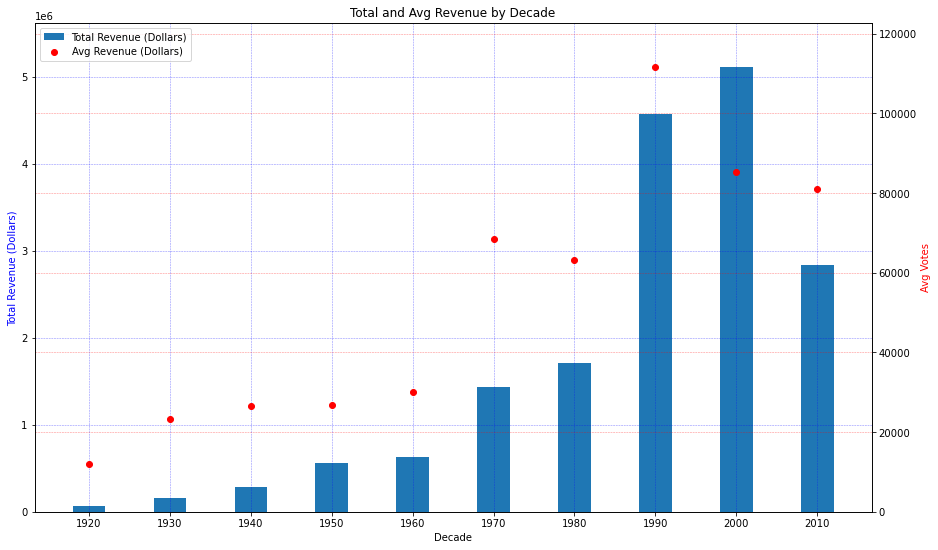

In [9]:
# Creating primary y-axis (total votes)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.bar(agg_decade['DECADE'], agg_decade['TOTAL_REVENUE'], 
        width = 0.4, align='center', label='Total Revenue (Dollars)')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Total Revenue (Dollars)', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

# Creating secondary y-axis (avg votes)
ax2 = ax1.twinx()
ax2.scatter(agg_decade['DECADE'], agg_decade['AVG_REVENUE'], 
         marker='o', color='red', label='Avg Revenue (Dollars)')
ax2.set_ylabel('Avg Votes', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Setting the same y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.1*max(agg_decade['TOTAL_REVENUE']))
ax2.set_ylim(0, 1.1*max(agg_decade['AVG_REVENUE']))

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title('Total and Avg Revenue by Decade')

# Show the plot
plt.show()

In [10]:
#check top 10 directors with most movies in IMDB 250
author_books = """
SELECT AUTHOR,
COUNT(TITLE) AS NUM_BOOKS,
SUM(REVENUE) AS TOTAL_REVENUE,
ROUND(AVG(REVENUE),0) AS AVG_REVENUE,
ROUND(AVG(RATING),2) AS AVG_RATING_PER_BOOK
FROM bookshop
GROUP BY AUTHOR
ORDER BY TOTAL_REVENUE DESC
LIMIT 10
"""

author_books = sqldf(author_books,locals())
author_books

,Author,NUM_BOOKS,TOTAL_REVENUE,AVG_REVENUE,AVG_RATING_PER_BOOK
0,Ava Mitchell,7,1356690,193813.0,8.57
1,Liam Parker,5,778205,155641.0,8.44
2,Emma Hayes,7,768502,109786.0,8.30
3,Sophia Reynolds,7,738778,105540.0,8.27
4,Lucas Bennett,3,571394,190465.0,8.50
5,Noah Foster,3,538781,179594.0,8.87
6,Lily Cooper,7,496584,70941.0,8.31
7,Mia Campbell,2,441703,220852.0,8.65
8,Ethan Lawson,3,431750,143917.0,8.87
9,Olivia Hudson,2,421061,210531.0,8.95


In [11]:
agg_author = pd.DataFrame(author_books)

C:\Users\jlenehan\AppData\Local\Temp\ipykernel_22260\2545147814.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(agg_author['Author'], rotation=-45, ha='left')


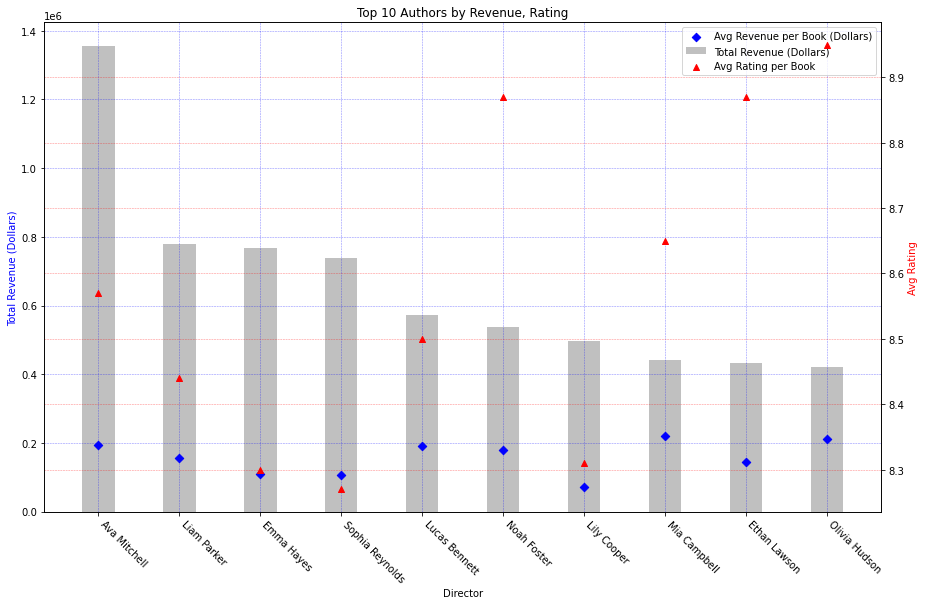

In [12]:
# Creating figure and axis
fig1, ax1 = plt.subplots(figsize=(15, 9))

#plotting bar chart of total votes
ax1.bar(agg_author['Author'], agg_author['TOTAL_REVENUE'], 
        width=0.4, align='center', color='silver', label='Total Revenue (Dollars)')
ax1.set_xlabel('Director')
ax1.set_xticklabels(agg_author['Author'], rotation=-45, ha='left')
ax1.set_ylabel('Total Revenue (Dollars)', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

#creating scatter plot of avg votes
ax1.scatter(agg_author['Author'], agg_author['AVG_REVENUE'], 
         marker="D", color='blue', label='Avg Revenue per Book (Dollars)')

# Creating scatter plot of avg rating on secondary axis
ax2 = ax1.twinx()
ax2.scatter(agg_author['Author'], agg_author['AVG_RATING_PER_BOOK'], 
         marker='^', color='red', label='Avg Rating per Book')
ax2.set_ylabel('Avg Rating', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Set title
plt.title('Top 10 Authors by Revenue, Rating')

# Show the plot
plt.show()

In [13]:
#build in percentile case when statement

pagelength_query = """
SELECT TITLE, REVENUE, NUMPAGES,
CASE
WHEN NUMPAGES < 318 THEN 'Quartile 1'
WHEN NUMPAGES BETWEEN 318 AND 375 THEN 'Quartile 2'
WHEN NUMPAGES BETWEEN 375 AND 438 THEN 'Quartile 3'
WHEN NUMPAGES > 438 THEN 'Quartile 4'
END AS PAGELENGTH_QUARTILE
FROM bookshop

ORDER BY REVENUE DESC
"""

pagelength_output = sqldf(pagelength_query,locals())
pagelength_output

,Title,Revenue,NumPages,PAGELENGTH_QUARTILE
0,Whispers in the Mist,303178,426,Quartile 3
1,Dark Whispers,282994,426,Quartile 3
2,Beneath the Surface,276914,456,Quartile 4
3,Love in Autumn,270698,417,Quartile 3
4,Hidden in Plain Sight,267234,444,Quartile 4
...,...,...,...,...
245,Eclipse of Desolation,6157,480,Quartile 4
246,Realm of Echoes,6007,612,Quartile 4
247,Sands of Echoes,5967,330,Quartile 2
248,Whispers of the Untold,5327,615,Quartile 4


In [14]:
pagelength_output = pd.DataFrame(pagelength_output)

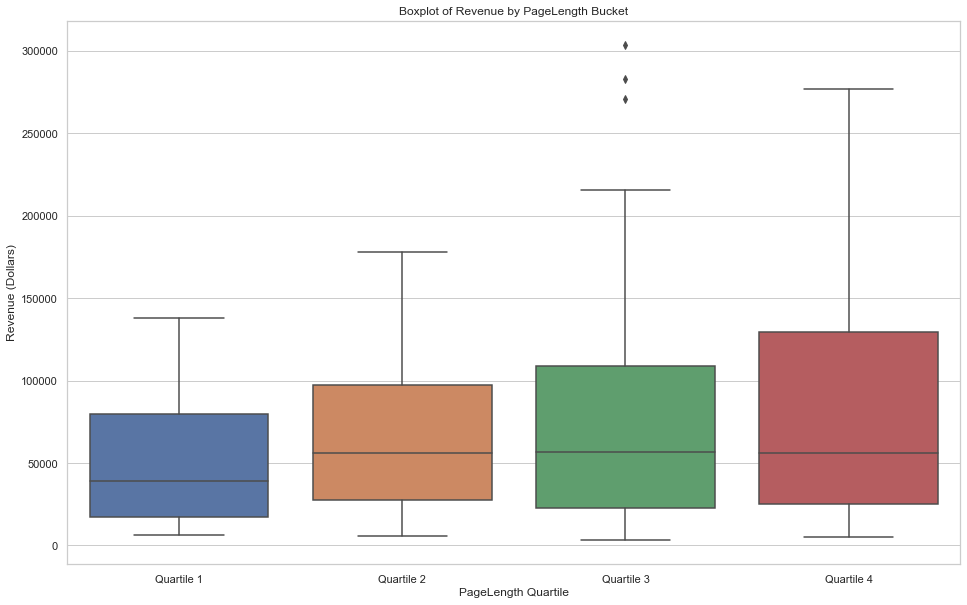

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

#Setting order of profit buckets
pagelength_bucket_order = ['Quartile 1', 'Quartile 2', 
                        'Quartile 3', 'Quartile 4']

# Create the boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='PAGELENGTH_QUARTILE', y='Revenue', 
            data=pagelength_output, order = pagelength_bucket_order, 
            showfliers=True)

# Add labels and title
plt.xlabel('PageLength Quartile')
plt.ylabel('Revenue (Dollars)')
plt.title('Boxplot of Revenue by PageLength Bucket')

# Show the plot
plt.show()